# Artificial Neural Network

### Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tensorflow as tf

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
tf.__version__


'2.9.2'

## Part 1 - Data Preprocessing

### Importing the dataset

In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/curnmodeling/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [16]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Cols with Outliers**

In [19]:
dataset.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
1%,100.99000,1.556851e+07,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
2%,200.98000,1.557093e+07,452.000000,22.000000,0.000000,0.000000,1.000000,0.00000,0.000000,3769.448800,0.000000
3%,300.97000,1.557373e+07,468.000000,23.000000,0.000000,0.000000,1.000000,0.00000,0.000000,5811.298500,0.000000
4%,400.96000,1.557613e+07,479.000000,24.000000,0.000000,0.000000,1.000000,0.00000,0.000000,8064.777600,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
10%,1000.90000,1.559117e+07,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000


*age and balance columns need outliner treatment*

In [20]:
col_with_ol=['Age','Balance']

In [21]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.98))
    return x

In [22]:
dataset[col_with_ol] = dataset[col_with_ol].apply(outlier_treatment)

In [23]:
dataset[col_with_ol].describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99])

,Age,Balance
count,10000.000000,10000.000000
mean,38.806100,76235.597250
std,10.120462,61945.816781
min,18.000000,0.000000
1%,21.000000,0.000000
2%,22.000000,0.000000
3%,23.000000,0.000000
4%,24.000000,0.000000
5%,25.000000,0.000000
10%,27.000000,0.000000


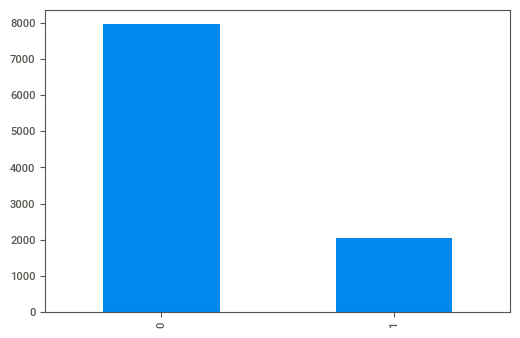

In [24]:
dataset["Exited"].value_counts().plot(kind="bar") 

2000 customers left the bank

**Exited customers by geography**

In [25]:
pd.crosstab(dataset["Exited"], dataset["Geography"])

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


In [26]:
pd.crosstab(dataset["Exited"], dataset["Gender"])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [27]:
sd = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).Exited.value_counts(normalize=True)*100)
sd

Exited
Gender Geography Exited           
Female France    0       79.655020
                 1       20.344980
       Germany   0       62.447611
                 1       37.552389
       Spain     0       78.787879
                 1       21.212121
Male   France    0       87.286596
                 1       12.713404
       Germany   0       72.188450
                 1       27.811550
       Spain     0       86.887608
                 1       13.112392

Germany has highest no. exited customer 

In [28]:
sk = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).IsActiveMember.value_counts())
sk

IsActiveMember
Gender Geography IsActiveMember                
Female France    1                         1162
                 0                         1099
       Germany   0                          634
                 1                          559
       Spain     1                          563
                 0                          526
Male   France    1                         1429
                 0                         1324
       Germany   1                          689
                 0                          627
       Spain     1                          749
                 0                          639

highest no, of active customer in france




In [29]:
sk = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).NumOfProducts.value_counts())
sk

NumOfProducts
Gender Geography NumOfProducts               
Female France    1                       1116
                 2                       1071
                 3                         55
                 4                         19
       Germany   1                        664
                 2                        462
                 3                         53
                 4                         14
       Spain     2                        527
                 1                        516
                 3                         41
                 4                          5
Male   France    1                       1398
                 2                       1296
                 3                         49
                 4                         10
       Germany   1                        685
                 2                        578
                 3                         43
                 4                         10
       Spain     1                        705
                 2                        656
                 3                         25
                 4                          2

in female category most of the customer have 2 products in spain 

In [30]:
sk = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).HasCrCard.value_counts(normalize=True)*100)
sk

HasCrCard
Gender Geography HasCrCard           
Female France    1          69.792127
                 0          30.207873
       Germany   1          70.662196
                 0          29.337804
       Spain     1          70.798898
                 0          29.201102
Male   France    1          71.376680
                 0          28.623320
       Germany   1          72.036474
                 0          27.963526
       Spain     1          68.443804
                 0          31.556196

70% of poulation have credit card in all locations

In [31]:
sk = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).Balance.mean())
sk

Balance
Gender Geography               
Female France      60071.895158
       Germany    118994.945704
       Spain       59596.998146
Male   France      63307.523845
       Germany    119994.037752
       Spain       63021.289276

Germany customers have highest average balance

In [32]:
sk = pd.DataFrame(dataset.groupby(['Gender', 'Geography']).Age.mean())
sk

Age
Gender Geography           
Female France     38.628925
       Germany    40.052808
       Spain      39.105601
Male   France     38.192154
       Germany    39.297112
       Spain      38.540346

38 - 40 is average age in all locations

In [33]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [34]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [36]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [41]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [43]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [44]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [45]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [46]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5916 - accuracy: 0.7345
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8061
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8094
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8155
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8177
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8221
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8251
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8267
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4120 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation



Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [47]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 129ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [48]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1501   94]
 [ 183  222]]


0.8615

1514 correct prediction customer stay in bank<br>
206 correct prediction customer leaves the bank<br>
81 incorrect prediction customer leaves the bank<br>
199 incoorect prediction customer stay in bank

In [50]:
!pip install sweetviz 
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import sweetviz 
import autosklearn.classification

                                             |          | [  0%]   00:00 -> (? left)


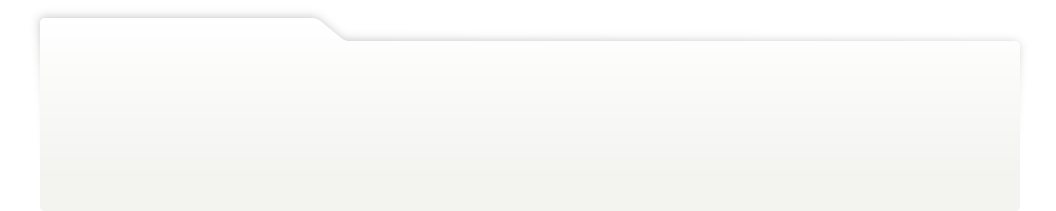
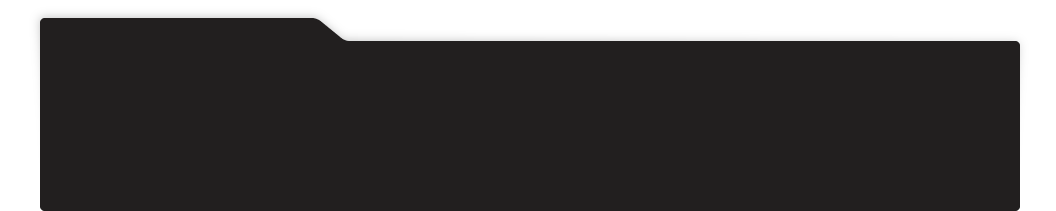
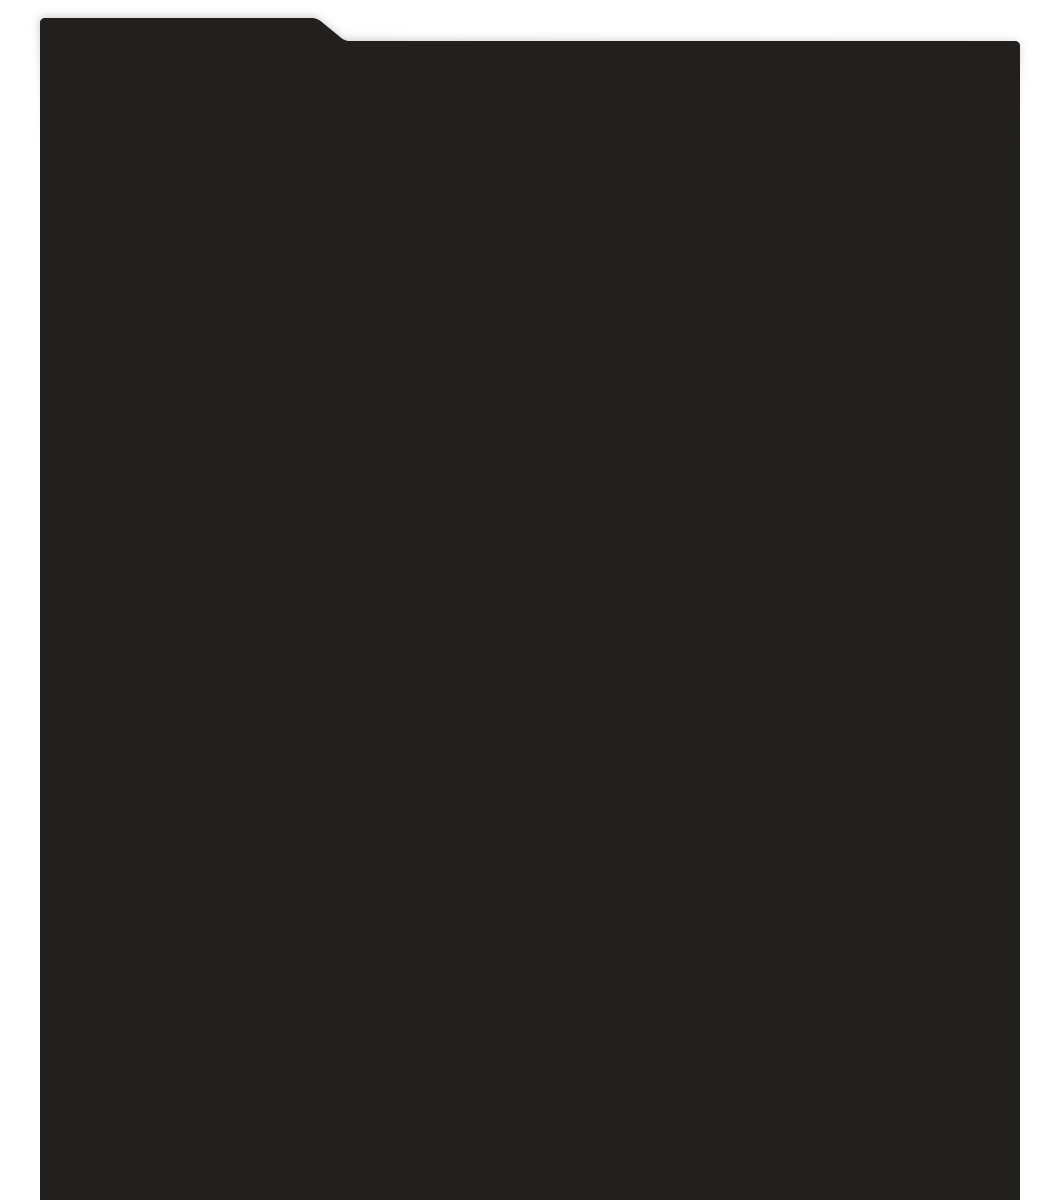
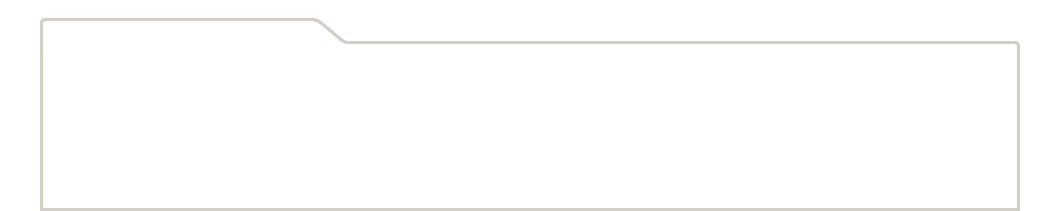
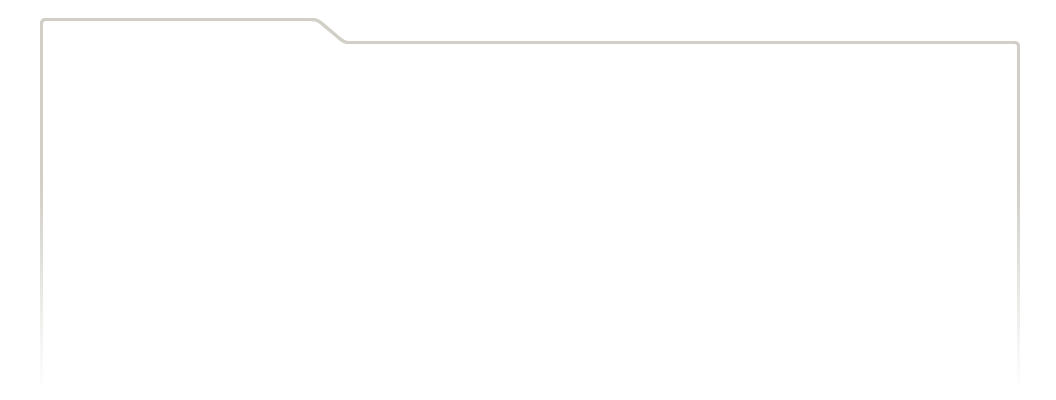
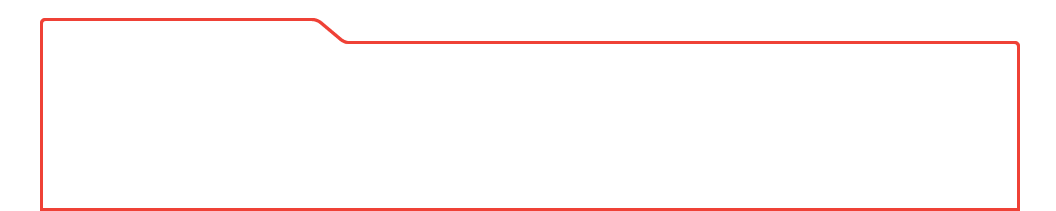
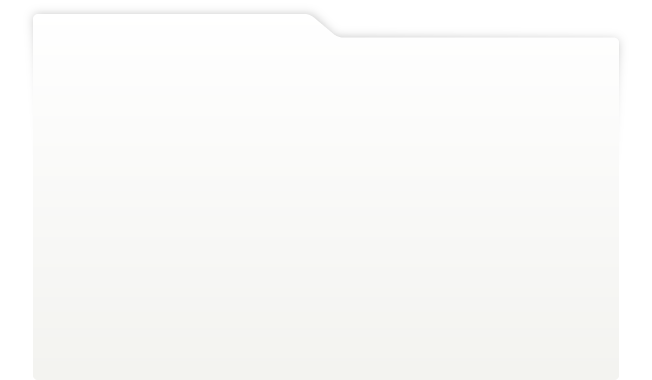
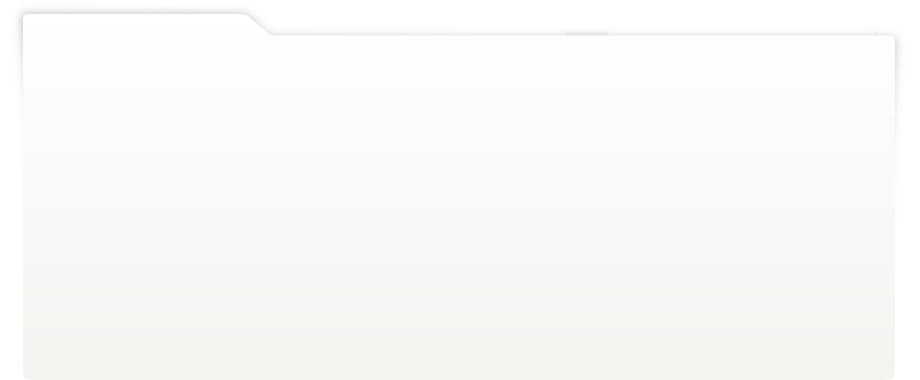
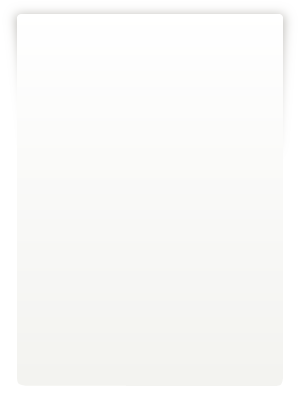
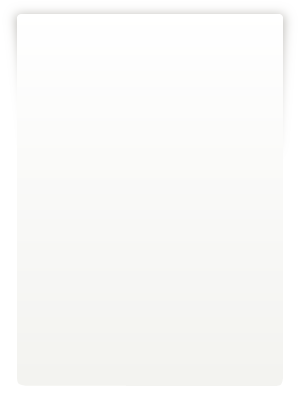
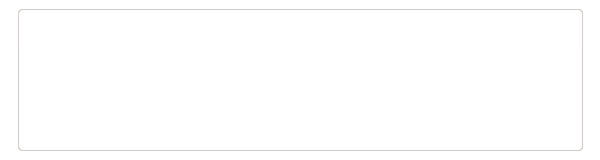
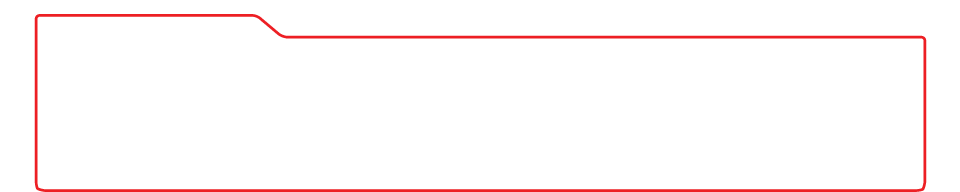
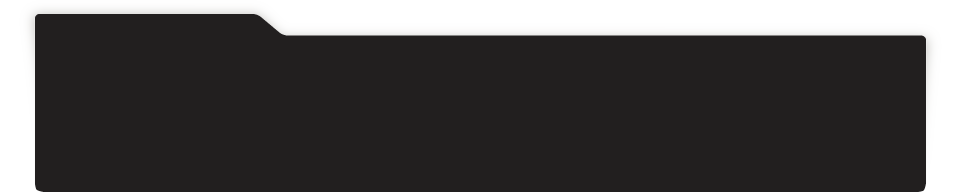
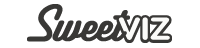
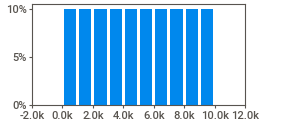
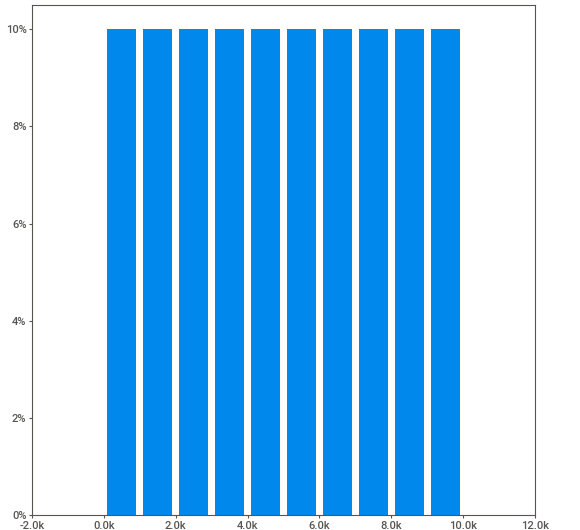
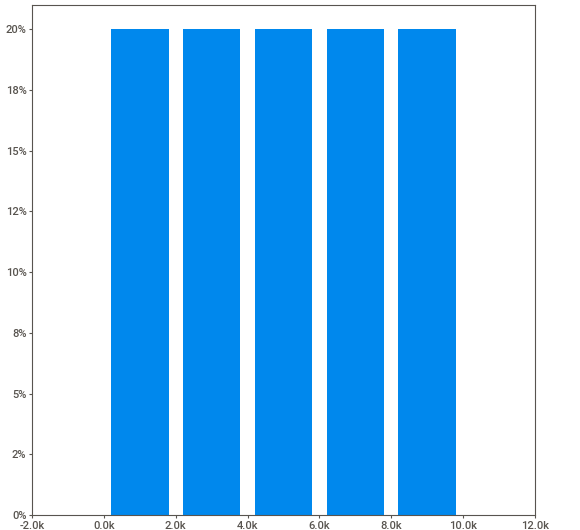
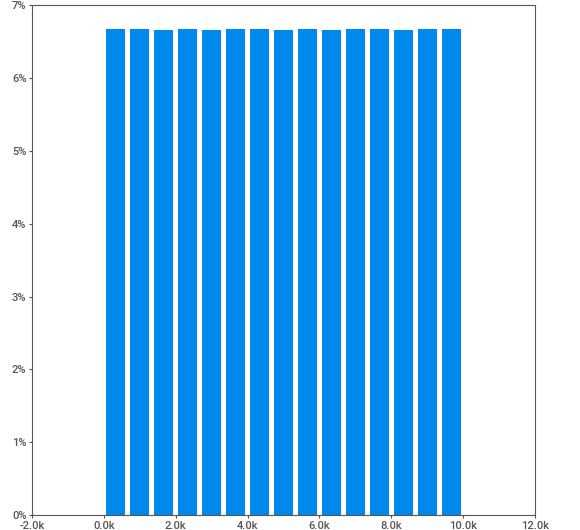
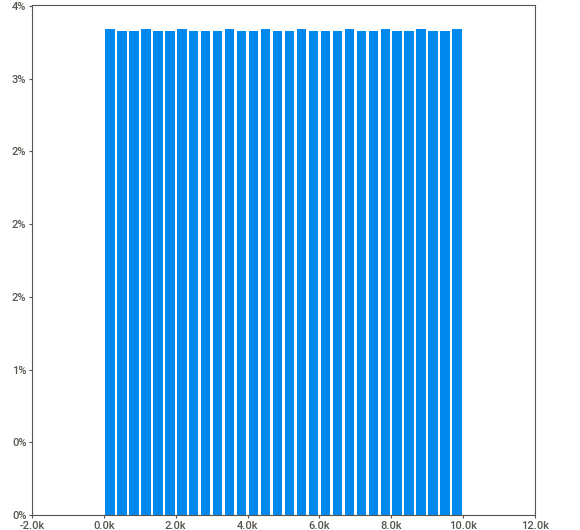
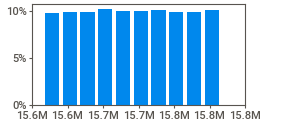
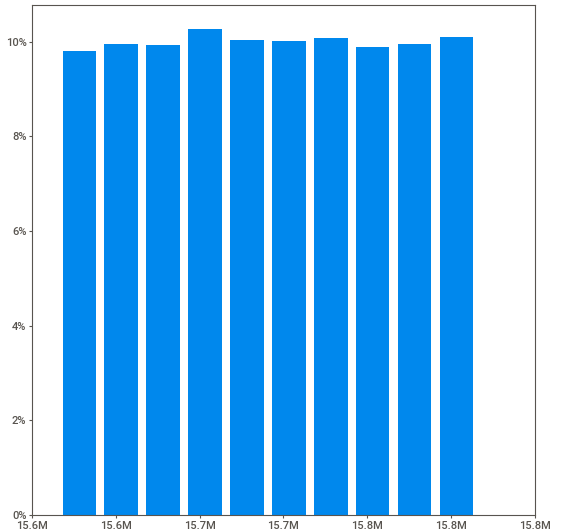
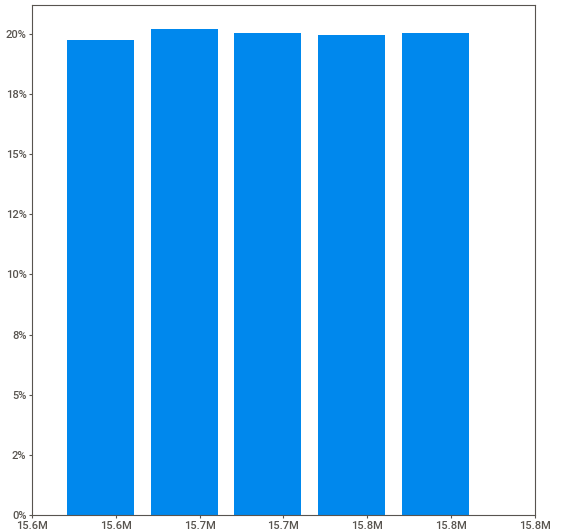
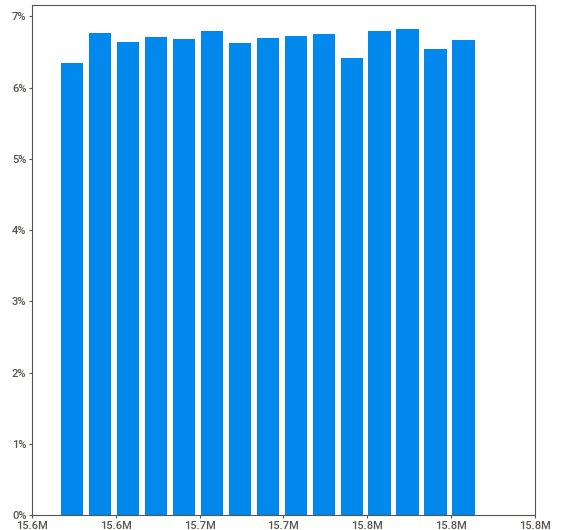
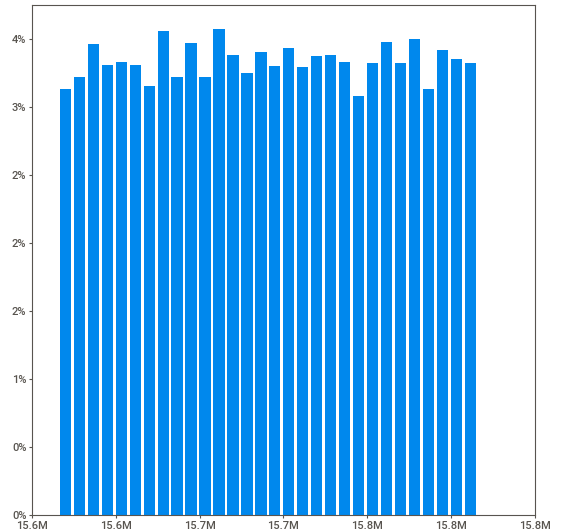
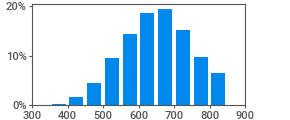
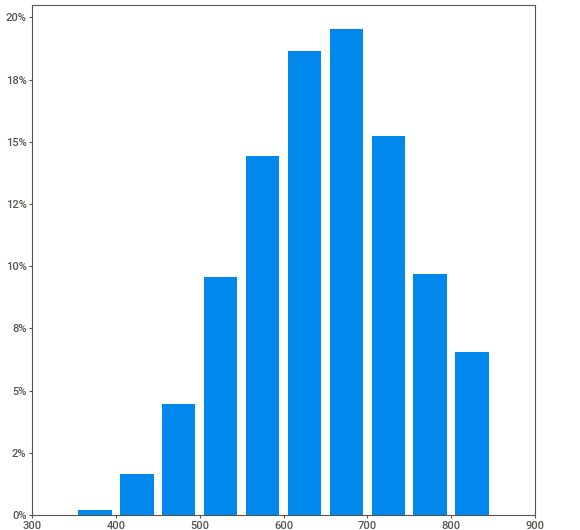
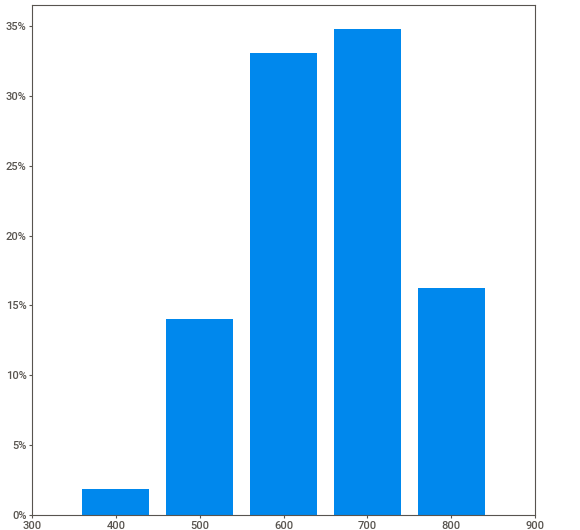
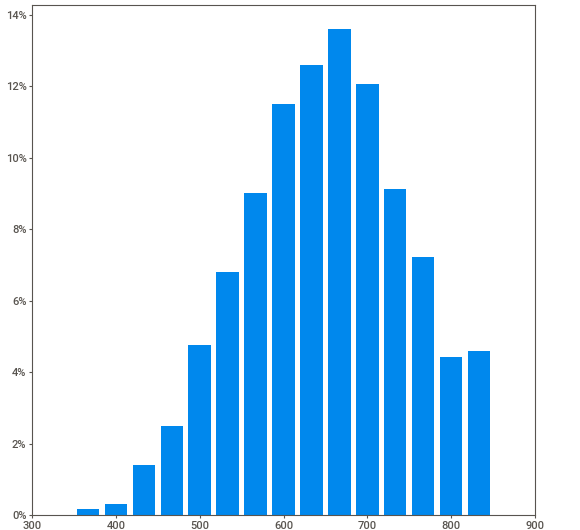
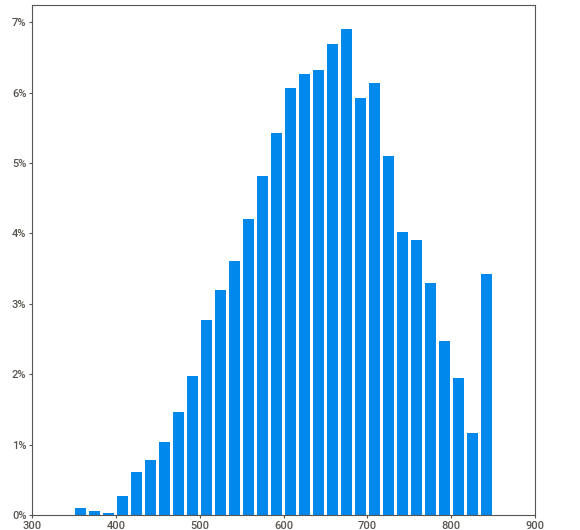
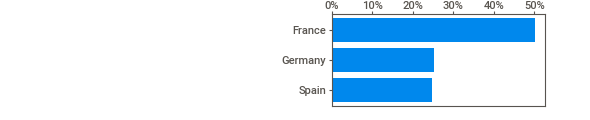
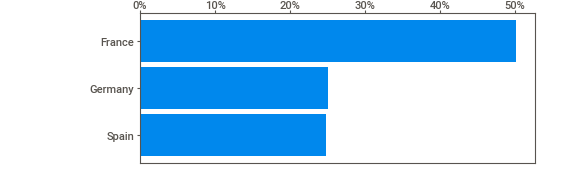
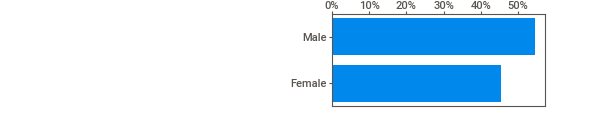
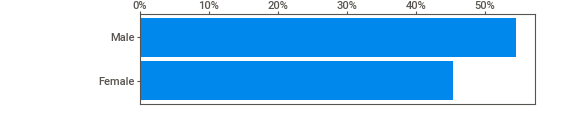
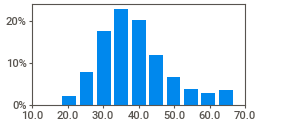
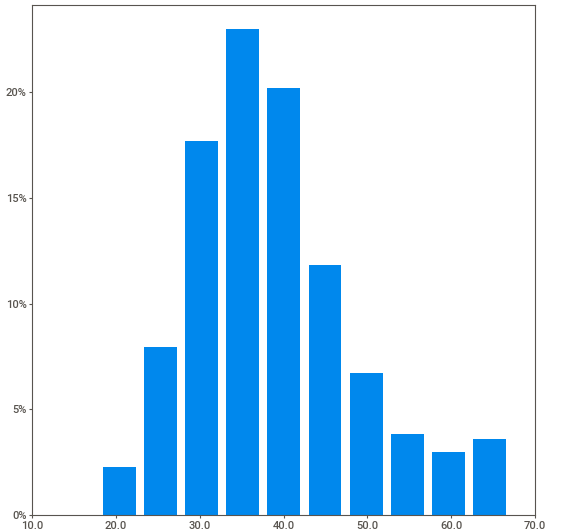
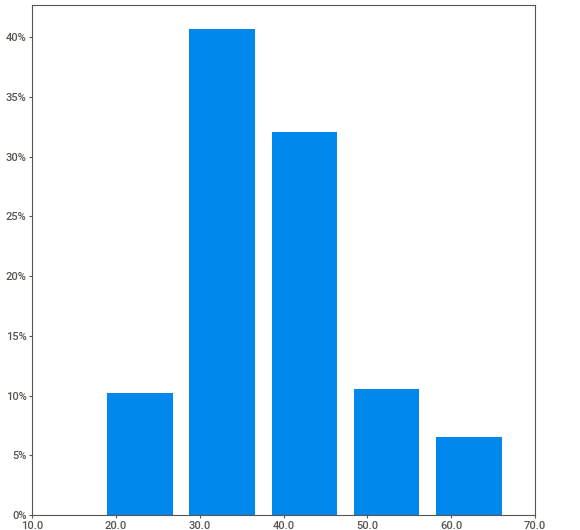
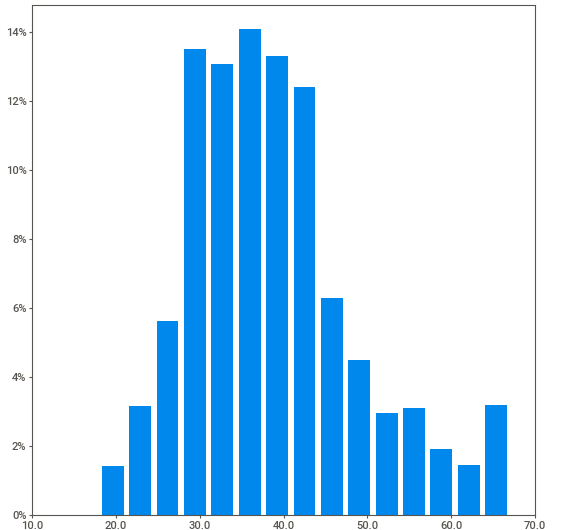
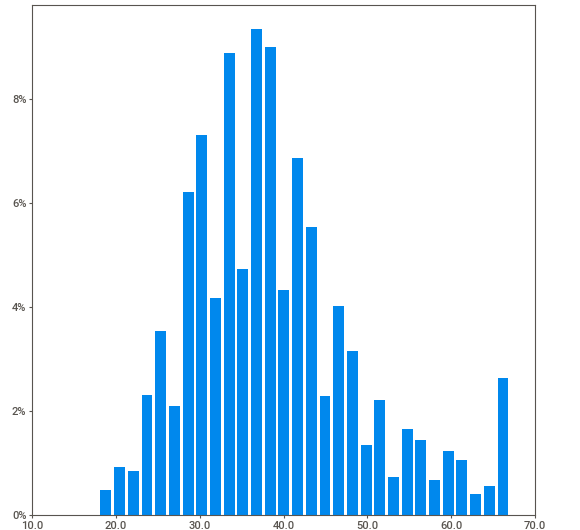
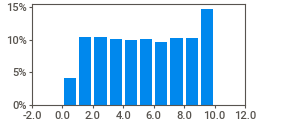
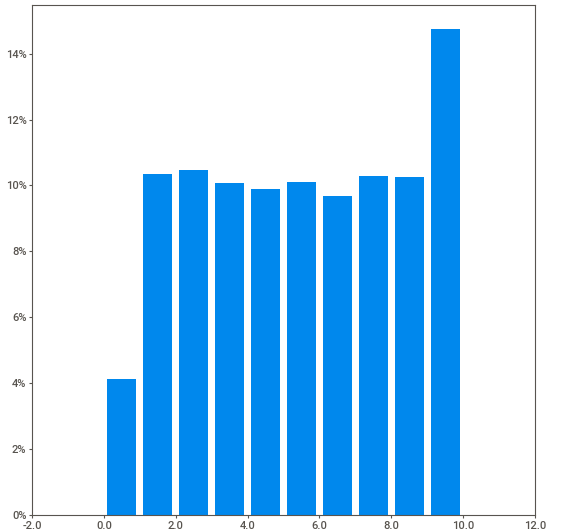
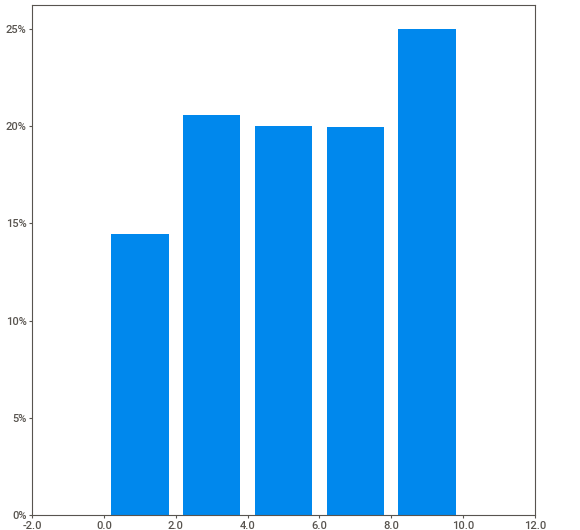
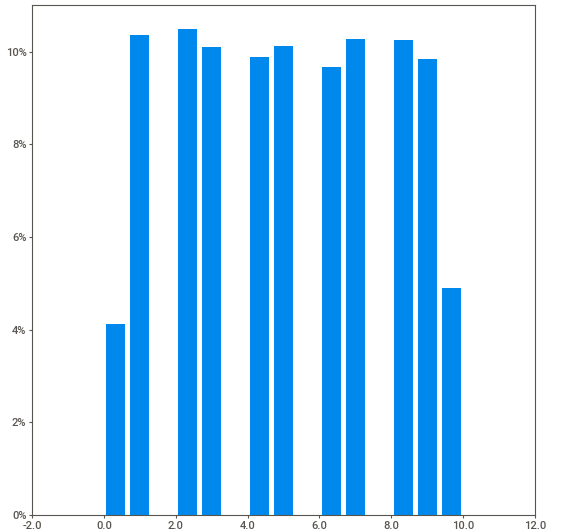
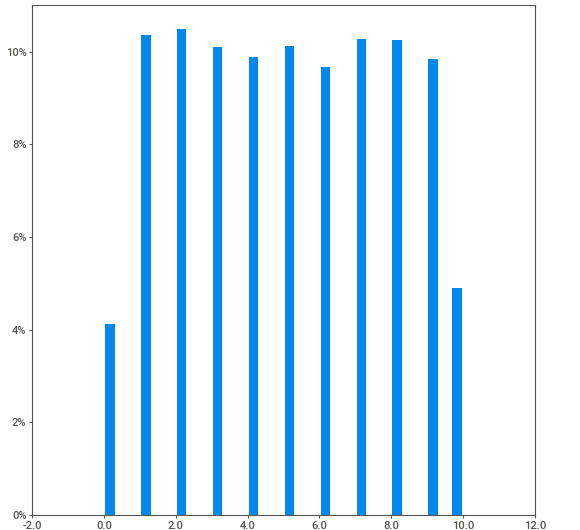
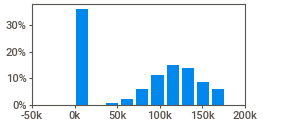
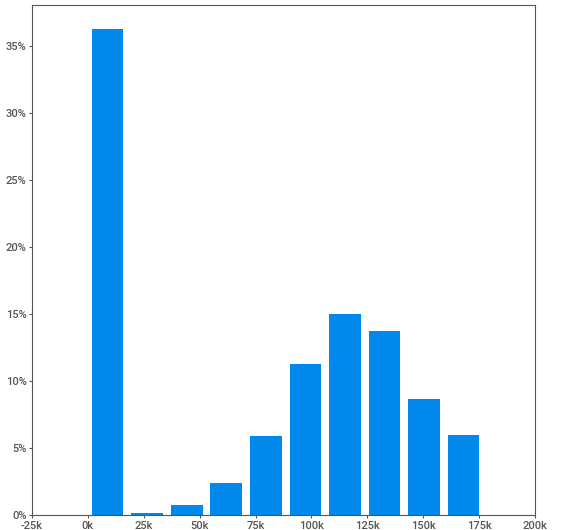
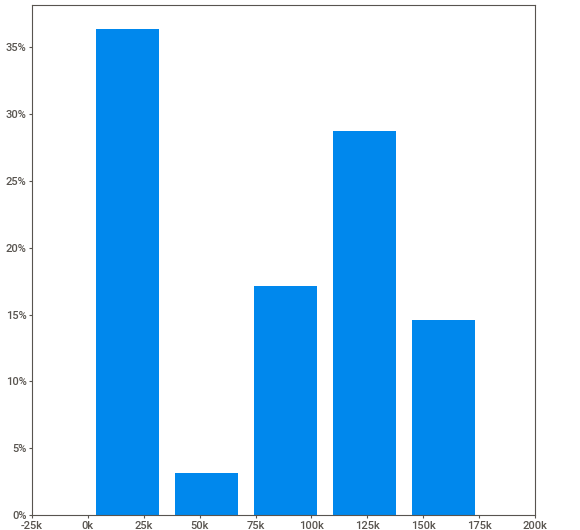
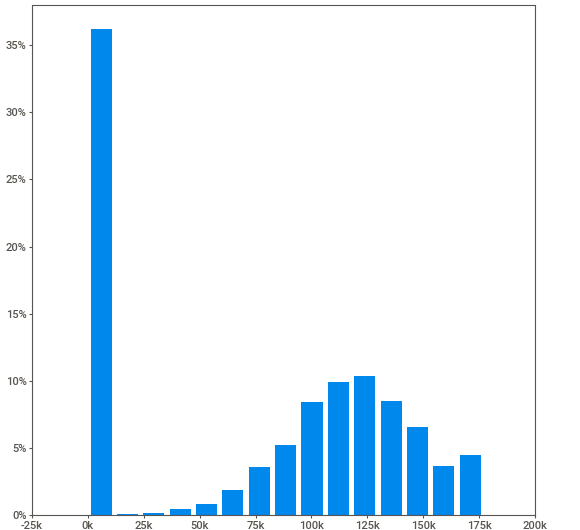
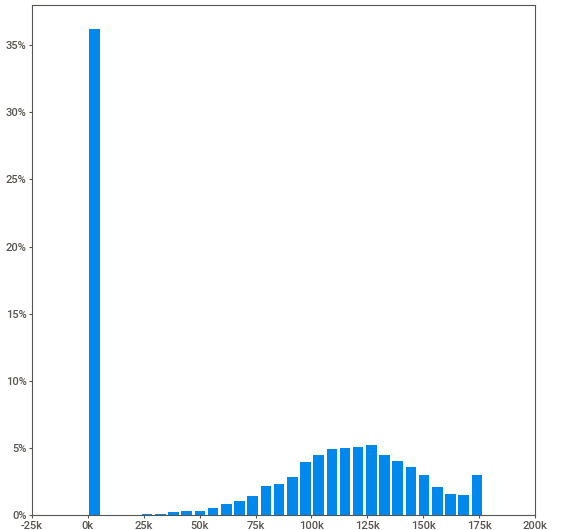
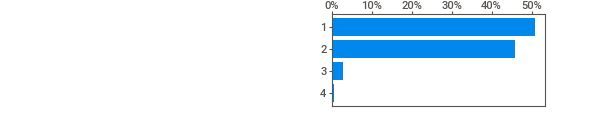
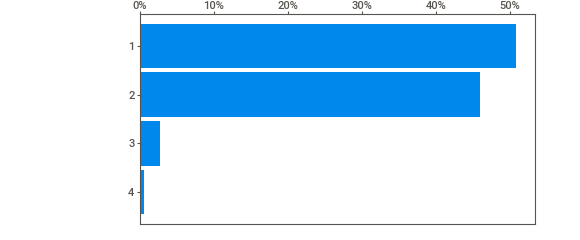
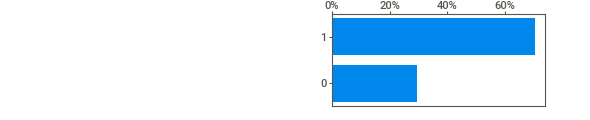
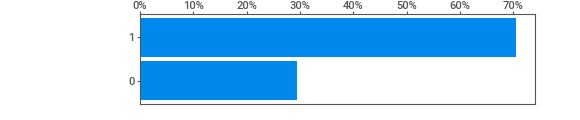
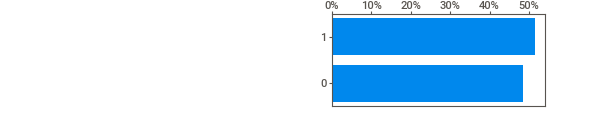
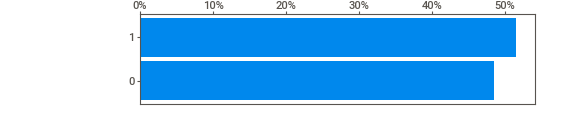
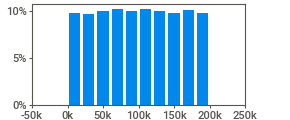
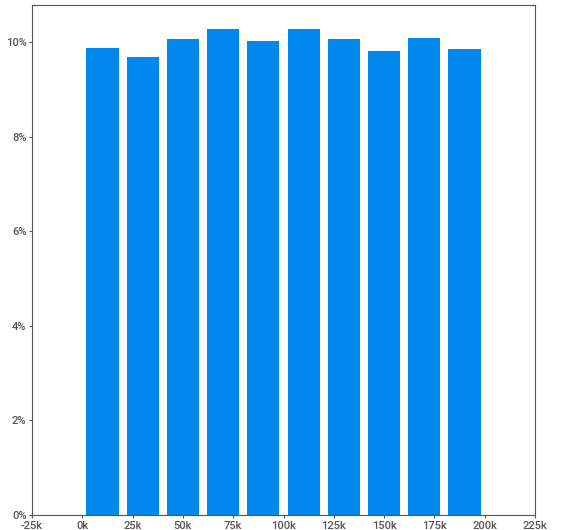
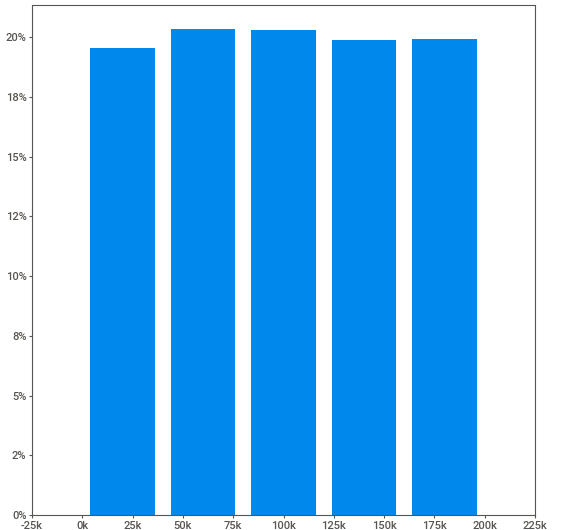
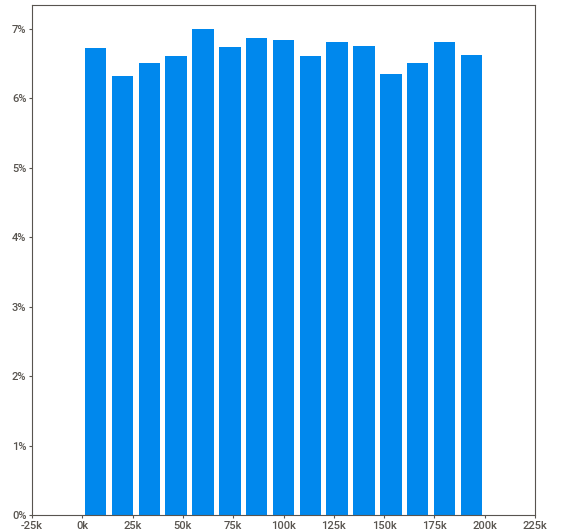
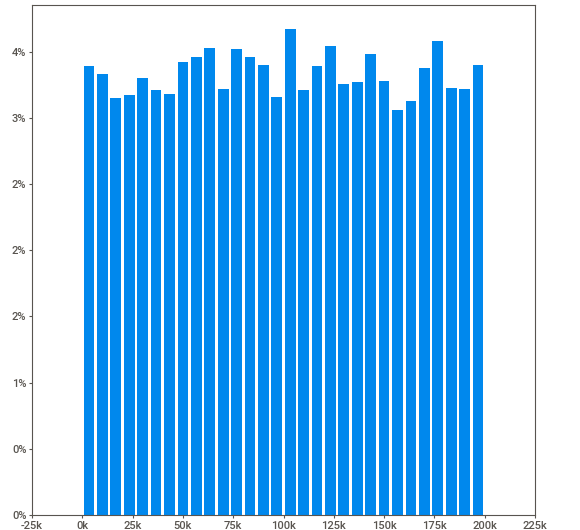
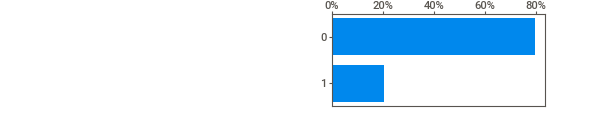
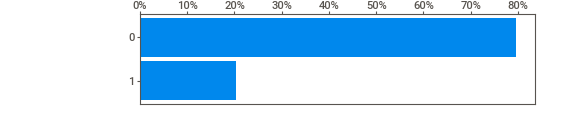
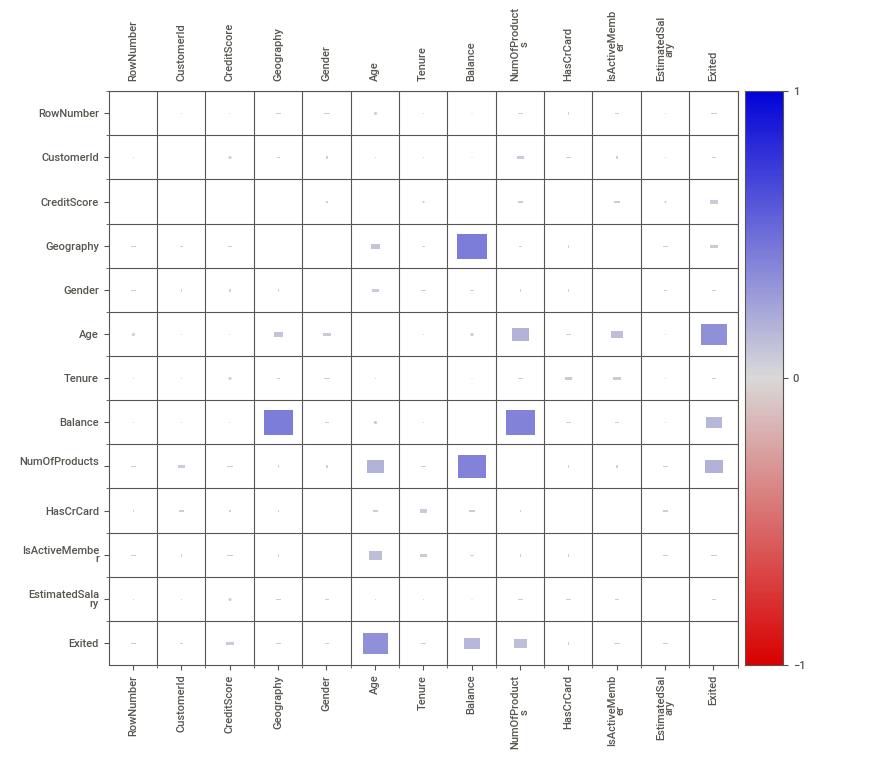
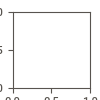

In [52]:
autoEDA = sweetviz.analyze(dataset)
autoEDA.show_notebook()

In [53]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [54]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7975



ann is better then automl 